# Intro to Centuri Hackathon 2023 Brainbow project

--- in progress ---

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

Functions (TODO: move to library)

In [139]:
def load_data(ds, acts='spks'):
    

    # loading data
    fluo = np.load(f'data/{ds}/physiology/neural_activity/F.npy')
    spks = np.load(f'data/{ds}/physiology/neural_activity/spks.npy')
    iscell = np.load(f'data/{ds}/physiology/neural_activity/iscell.npy')

    if acts == 'spks':
        data = prepare_data(spks, iscell) # here choose spikes or fluorescence + get rid of non-cells + z-scores
    elif acts == 'fluo':
        data = prepare_data(fluo, iscell)
        
    t_max = data.shape[1]
    n_max = data.shape[0]
    
    print('Length of recording (timestamps): ', t_max)
    print('Number of ROIs: ', n_max)

    return data

In [140]:
def prepare_data(data_in, iscell):
    
    iscell_bool = iscell[:,0].astype(bool) # getting rid of 'non-cells'
    
    data = data_in[iscell_bool,:] # choose which data to analyse (spks or fluo)
    data = (data-np.mean(data,1)[:,np.newaxis])/np.std(data,1)[:,np.newaxis]
    
    return data

In [141]:
def get_tstamps(tseries, F):
    return np.arange(0, tseries.shape[1]/F, 1/F)

In [143]:
def load_tiff(ds, channel=''):
    img = Image.open(f'data/{ds}/anatomy/{channel}.tif')
    return np.array(img)

In [147]:
def fov_show(img, cmap='Greys_r', vmax_fact=1/2, title=''):
    plt.figure(dpi=100)
    plt.imshow(img,cmap=cmap, vmax = np.max(img)*vmax_fact)
    plt.axis('off')
    plt.title(title)
    plt.show()


### Choosing dataset

In [138]:
ds = 'day3' # choose day3 for starters
F = 10 # all data here is acquired at 10 Hz

In [142]:
from PIL import Image

In [144]:
# loading images (anatomy)
img_r = load_tiff(ds, channel='red')
img_g = load_tiff(ds, channel='green')
img_b = load_tiff(ds, channel='blue')

In [146]:
# loading activity (physiology)
tseries = load_data(ds, acts='fluo')
tstamps = get_tstamps(tseries, F) # timestamps vector

Length of recording (timestamps):  12378
Number of ROIs:  361


# TODO: 
1) add plotting of 10 randomly chosen cells
2) add plotting of raster unsorted and sorted by tsne
3) add loading and plotting tiffs

In [148]:
# 1)

In [149]:
# 2)

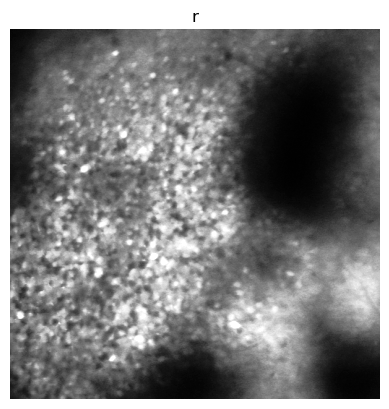

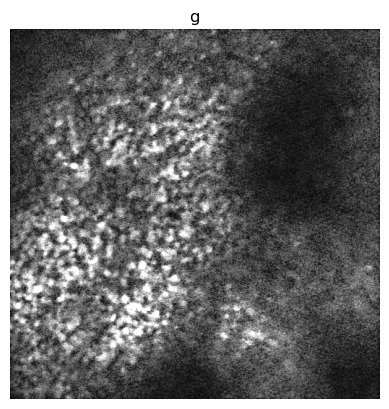

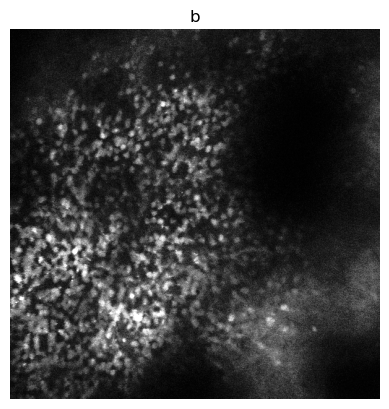

In [150]:
# 3)
fov_show(img_r, title='r')
fov_show(img_g, title='g')
fov_show(img_b, title='b')